In [7]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt

test_path = Path("python_client/experiments/torque_vs_angle.csv")
time_data = []
thrust_data = []
torque_data = []

with test_path.open() as test_data:
    csv_rows = csv.reader(test_data)

    # Skip preamble
    next(csv_rows)
    next(csv_rows)
    next(csv_rows)
    next(csv_rows)

    for row in csv_rows:
        time = float(row[2])
        thrust = float(row[0])
        torque = float(row[1])

        time_data += [time]
        thrust_data += [thrust]
        torque_data += [torque]

728

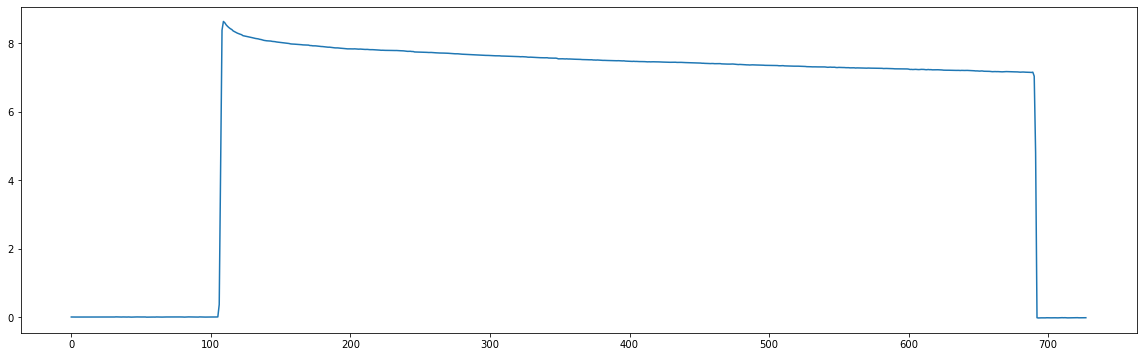

In [55]:
plt.figure(figsize=(20,6))
plt.plot(thrust_data)

In [50]:
deflection_to_torque = {
    0:   0.0,
    10:  0.0331,
    20:  0.0403,
    30:  0.0448,
    40:  0.0516,
    50:  0.0582,
    60:  0.0630,
    70:  0.0739,
    80:  0.0802,
    90:  0.0847,
    100: 0.0945,
}

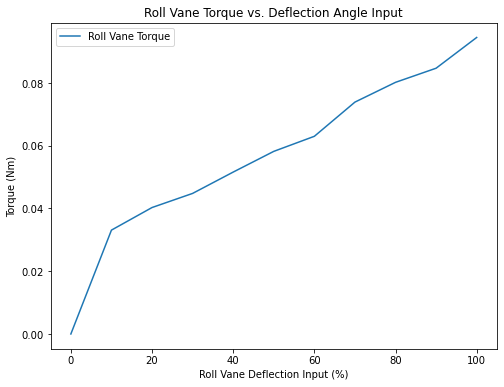

In [56]:
plt.figure(figsize=(8,6))
plt.plot(deflection_to_torque.keys(), deflection_to_torque.values(), label="Roll Vane Torque")
plt.xlabel("Roll Vane Deflection Input (%)")
plt.ylabel("Torque (Nm)")
plt.title("Roll Vane Torque vs. Deflection Angle Input")
plt.legend()

Text(0.5, 1.0, 'Thrust vs. Time')

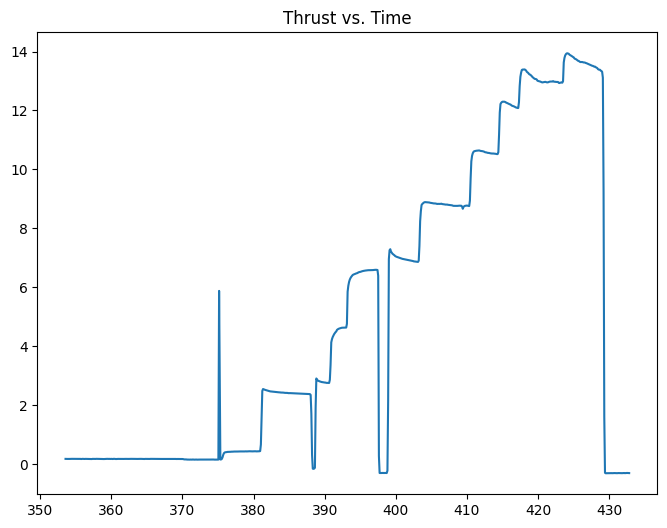

In [131]:
def lpf(data, alpha):
    for i, p in enumerate(data):
        data[i] = p * alpha + data[i-1] * (1 - alpha)

def lerp(data, start_i, end_i):
    width = end_i + 1 - start_i
    for i in range(start_i, start_i + width):
        t = (i - start_i) / width
        lerped = (data[end_i] - data[start_i]) * t + data[start_i]
        data[i] = lerped

# filtered = thrust_data.copy()
# lerp(filtered, 210, 220)
# lerp(filtered, 340, 370)
# lerp(filtered, 430, 490)
# lpf(filtered, 0.5)

plt.figure(figsize=(8,6))
plt.plot(time_data, thrust_data)
plt.title("Thrust vs. Time")